**ranger包提供了“impurity_corrected”特征重要性评价，克服了impurity倾向于类别多特征的问题**

本教程实验验证’impurity’, ’impurity_corrected’, ’permutation’三种特征重要性评价方式是否倾向于类别多特征

注：impurity_corrected机理没搞明白，请网友帮助解释

In [1]:
options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

library(pacman)
p_load(skimr)
s <- skim_tee

## 分类

In [22]:
# 生成数据--x1~x6与y独立
n <- 500    #数据量
set.seed(101)
x1 <- factor((sample(n) %% 2)) # 2种取值
set.seed(102)
x2 <- factor((sample(n) %% 10)) # 10种取值
set.seed(103)
x3 <- factor((sample(n) %% 20)) # 20种取值
set.seed(104)
x4 <- factor((sample(n) %% 25)) # 25种取值
set.seed(105)
x5 <- factor((sample(n) %% 50)) # 50种取值
set.seed(106)
x6 <- factor((sample(n) %% 100)) # 100种取值
set.seed(100)
y <- factor((sample(n) %% 2))

dt <- data.frame(x1, x2, x3, x4, x5, x6, y)
s(dt)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             500   
Number of columns          7     
_______________________          
Column type frequency:           
  factor                   7     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts                
1 x1                    0             1 FALSE          2 0: 250, 1: 250            
2 x2                    0             1 FALSE         10 0: 50, 1: 50, 2: 50, 3: 50
3 x3                    0             1 FALSE         20 0: 25, 1: 25, 2: 25, 3: 25
4 x4                    0             1 FALSE         25 0: 20, 1: 20, 2: 20, 3: 20
5 x5                    0             1 FALSE         50 0: 10, 1: 10, 2: 10, 3: 10
6 x6   

In [23]:
# 独立性假设检验
(chisq.test(table(x1, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x2, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x3, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x4, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x5, y), simulate.p.value = TRUE)$p.value)
(chisq.test(table(x6, y), simulate.p.value = TRUE)$p.value)

[1] 0.5382309

[1] 0.9345327

[1] 0.9890055

[1] 0.4042979

[1] 0.878061

[1] 0.9650175

可见 p值均>>0.05，不能拒绝x1~x4与y独立

  |==================================================================================================================================| 100%

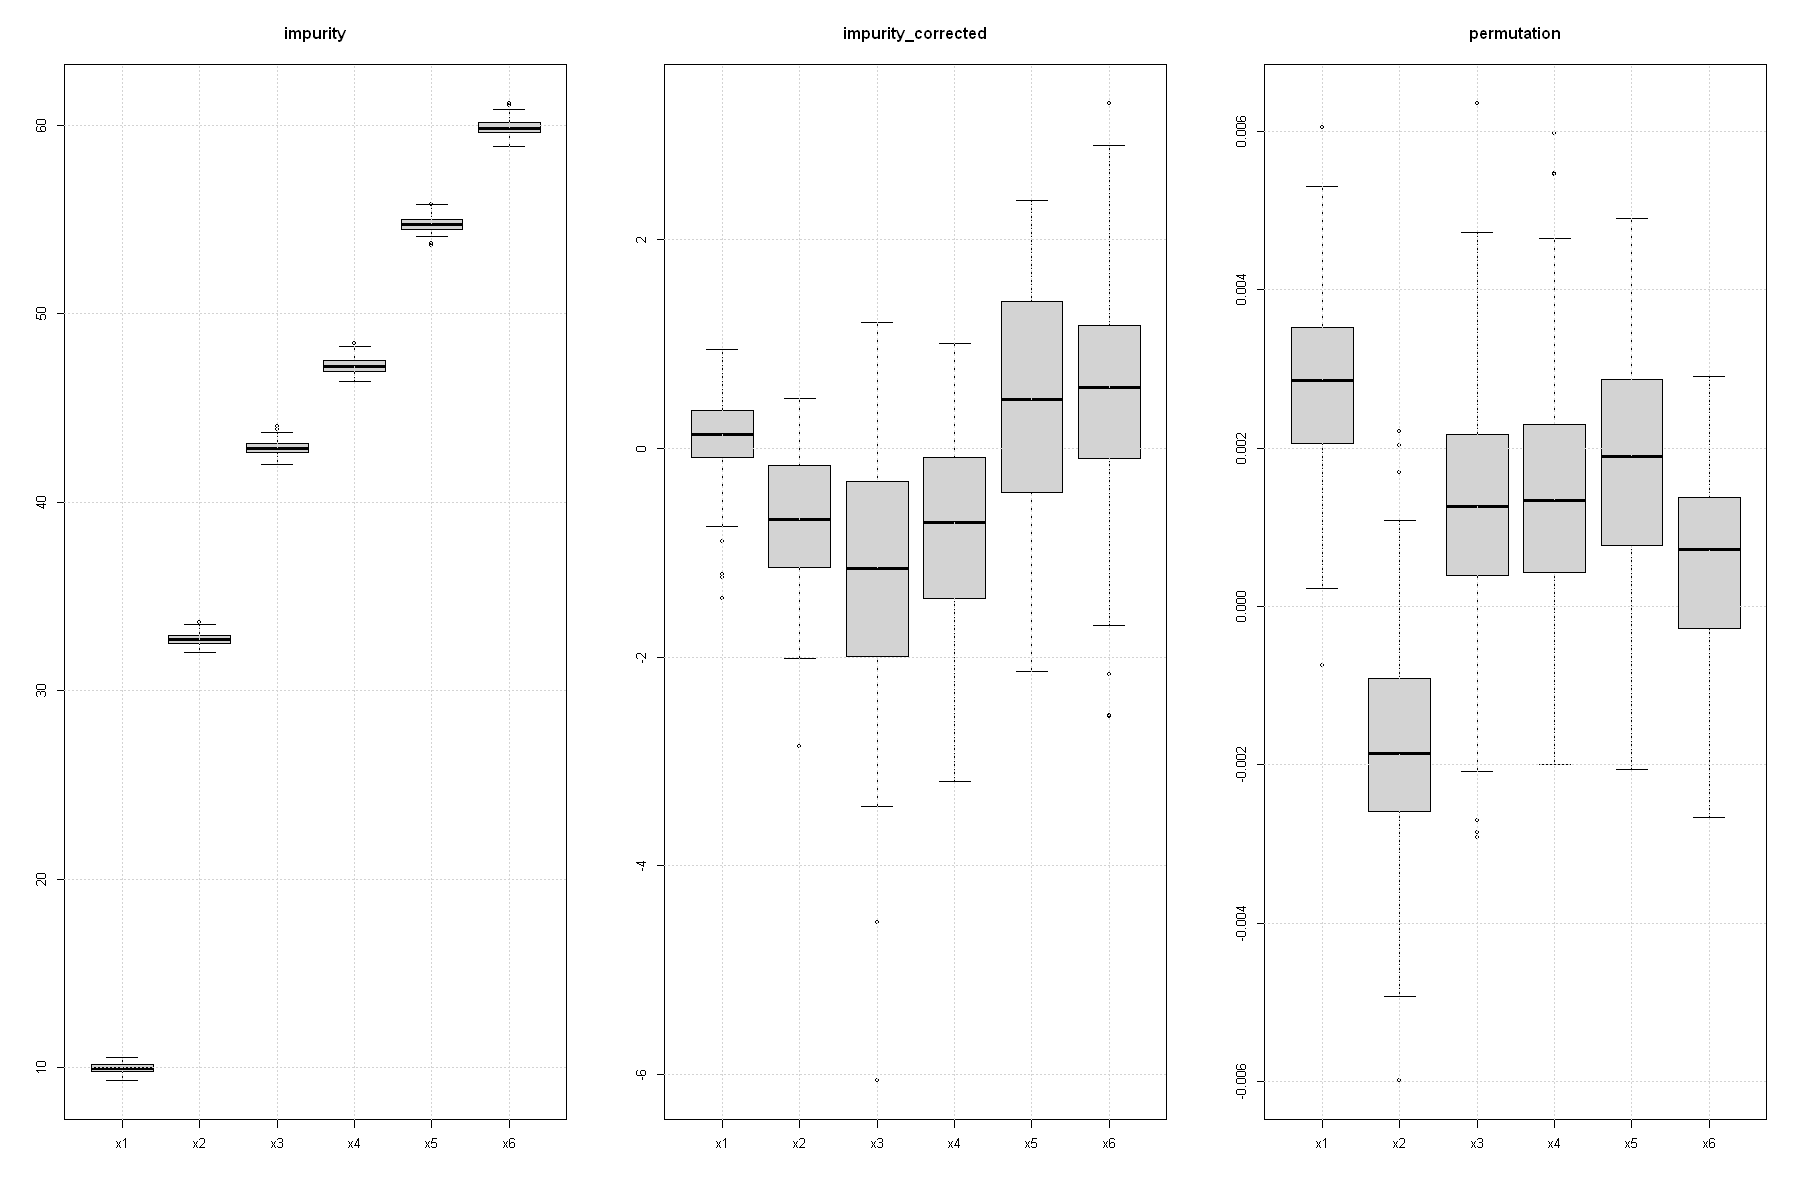

In [25]:
nr <- 100 # number of experiment

n <- 6
ImpIpt <- matrix(ncol = n, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpIpt) <- paste("x", (1:n), sep = "") # 以变量名命名列
ImpIptc <- matrix(ncol = n, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpIptc) <- paste("x", (1:n), sep = "") # 以变量名命名列
ImpPerm <- matrix(ncol = n, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpPerm) <- paste("x", (1:n), sep = "") # 以变量名命名列

p_load(ranger)
pb <- txtProgressBar(style = 3)
for (i in 1:nr) {
  set.seed(i)
  rg1 <- ranger(y ~ ., data = dt, importance = "impurity")
  rg2 <- ranger(y ~ ., data = dt, importance = "impurity_corrected")
  rg3 <- ranger(y ~ ., data = dt, importance = "permutation")

  ImpIpt[i, ] <- rg1$variable.importance
  ImpIptc[i, ] <- rg2$variable.importance
  ImpPerm[i, ] <- rg3$variable.importance

  setTxtProgressBar(pb, i / nr)
}

par(mfrow = c(1, 3))
boxplot(ImpIpt, main = "impurity")
grid()
boxplot(ImpIptc, main = "impurity_corrected")
grid()
boxplot(ImpPerm, main = "permutation")
grid()

可见重要性评价：
- impurity倾向于类别多的特征
- impurity_corrected、permutation无此倾向

## 回归

In [13]:
# 生成数据--x1~x6与y独立
n <- 1000    #数据量
set.seed(101)
x1 <- factor((sample(n) %% 2)) # 2种取值
set.seed(102)
x2 <- factor((sample(n) %% 10)) # 10种取值
set.seed(103)
x3 <- factor((sample(n) %% 20)) # 20种取值
set.seed(104)
x4 <- factor((sample(n) %% 25)) # 25种取值
set.seed(105)
x5 <- factor((sample(n) %% 50)) # 50种取值
set.seed(106)
x6 <- factor((sample(n) %% 100)) # 100种取值
set.seed(100)
y <- runif(n, min = 0, max = 1)

dt <- data.frame(x1, x2, x3, x4, x5, x6, y)
s(dt)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1000  
Number of columns          7     
_______________________          
Column type frequency:           
  factor                   6     
  numeric                  1     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts                    
1 x1                    0             1 FALSE          2 0: 500, 1: 500                
2 x2                    0             1 FALSE         10 0: 100, 1: 100, 2: 100, 3: 100
3 x3                    0             1 FALSE         20 0: 50, 1: 50, 2: 50, 3: 50    
4 x4                    0             1 FALSE         25 0: 40, 1: 40, 2: 40, 3: 40    
5 x5                    0            

In [14]:
# 独立性假设检验
kruskal.test(x1 ~ y)$p.value
kruskal.test(x2 ~ y)$p.value
kruskal.test(x3 ~ y)$p.value
kruskal.test(x4 ~ y)$p.value
kruskal.test(x5 ~ y)$p.value
kruskal.test(x6 ~ y)$p.value

[1] 0.4940499

[1] 0.4940499

[1] 0.4940499

[1] 0.4940499

[1] 0.4940499

[1] 0.4940499

可见 p值均>>0.05，不能拒绝x1~x4与y独立

  |==================================================================================================================================| 100%

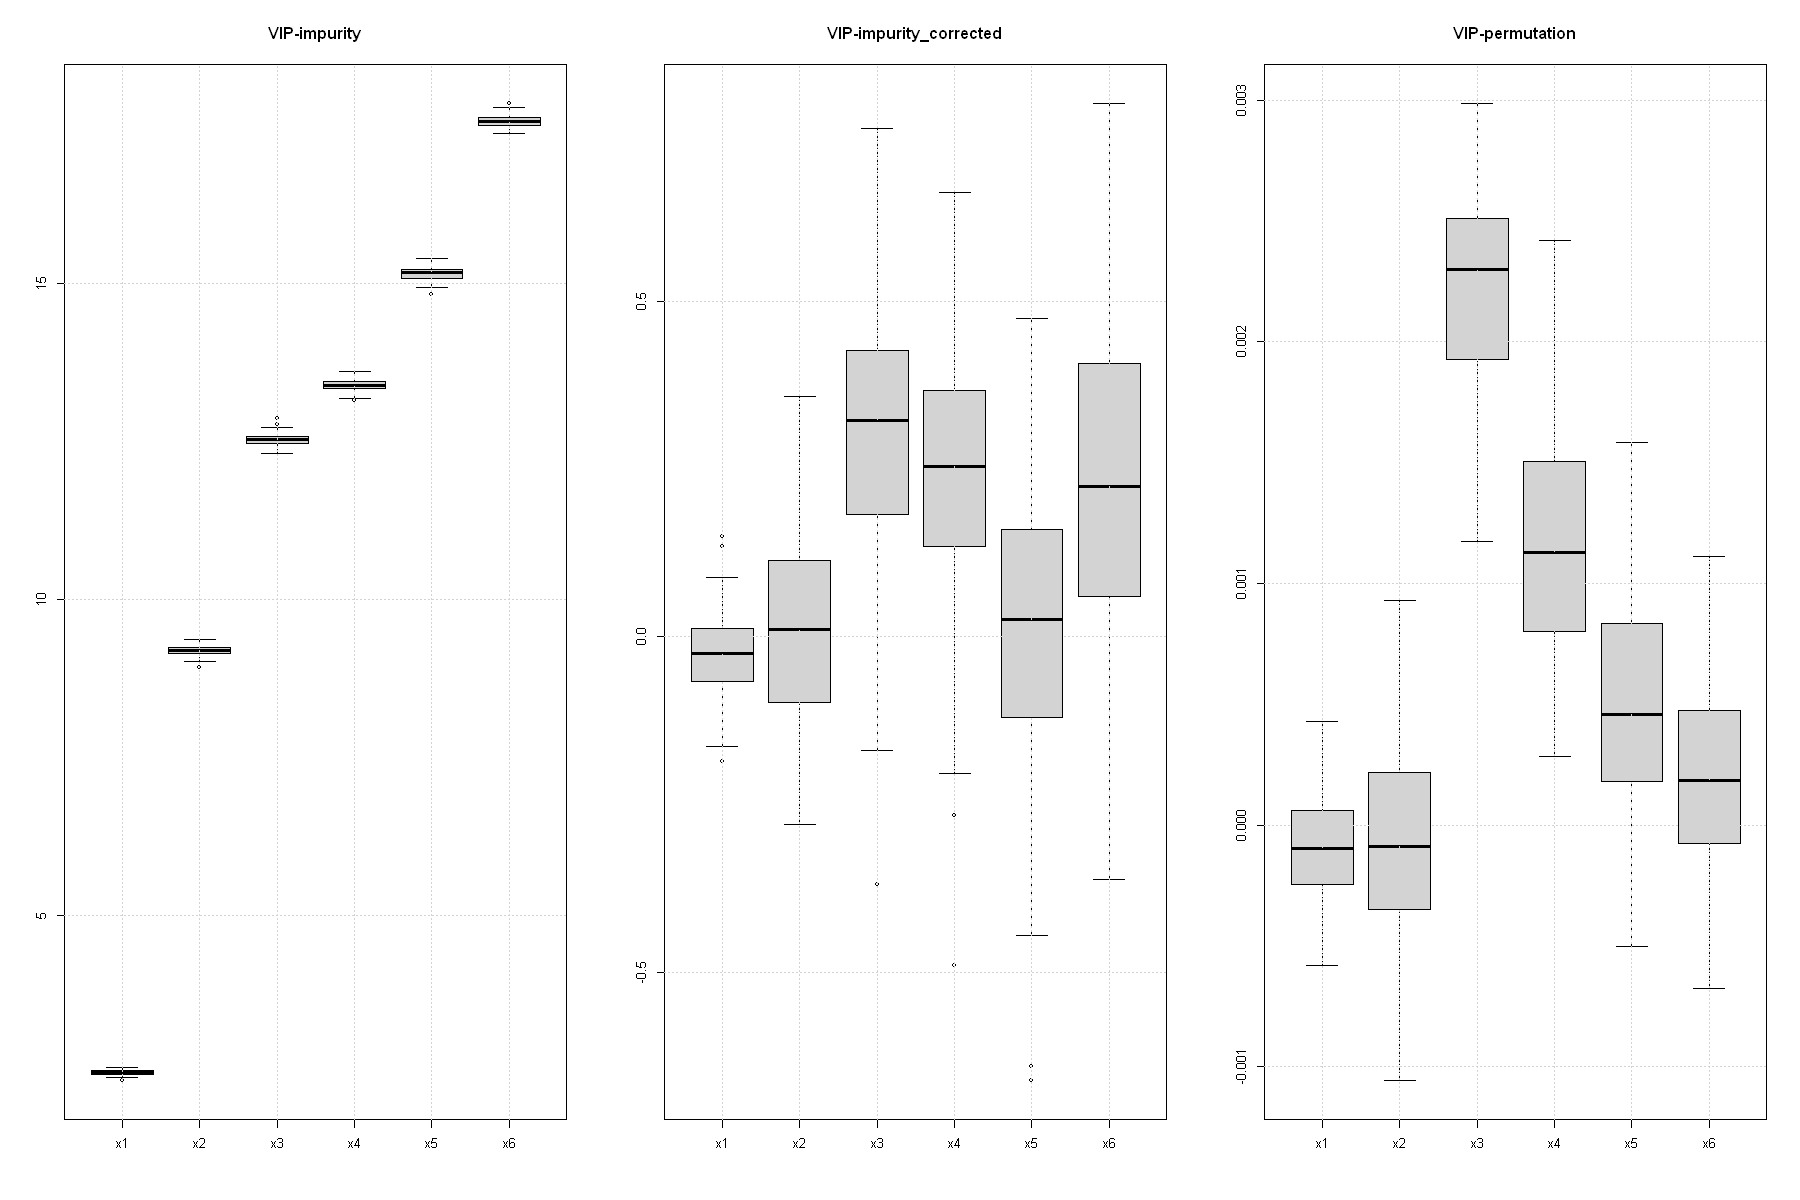

In [15]:
nr <- 100 # number of experiment

n <- 6
ImpIpt <- matrix(ncol = n, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpIpt) <- paste("x", (1:n), sep = "") # 以变量名命名列
ImpIptc <- matrix(ncol = n, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpIptc) <- paste("x", (1:n), sep = "") # 以变量名命名列
ImpPerm <- matrix(ncol = n, nrow = nr) # 用于存储多次实验得到Permutation Importance的数据
colnames(ImpPerm) <- paste("x", (1:n), sep = "") # 以变量名命名列

p_load(ranger)
pb <- txtProgressBar(style = 3)
for (i in 1:nr) {
  set.seed(i)
  rg1 <- ranger(y ~ ., data = dt, importance = "impurity")
  rg2 <- ranger(y ~ ., data = dt, importance = "impurity_corrected")
  rg3 <- ranger(y ~ ., data = dt, importance = "permutation")

  ImpIpt[i, ] <- rg1$variable.importance
  ImpIptc[i, ] <- rg2$variable.importance
  ImpPerm[i, ] <- rg3$variable.importance

  setTxtProgressBar(pb, i / nr)
}

par(mfrow = c(1, 3))
boxplot(ImpIpt, main = "VIP-impurity")
grid()
boxplot(ImpIptc, main = "VIP-impurity_corrected")
grid()
boxplot(ImpPerm, main = "VIP-permutation")
grid()

可见重要性评价：
- impurity倾向于类别多的特征
- impurity_corrected、permutation无此倾向